# The Prototype Pattern

### Problem

This pattern is particularly useful when **the cost of creating a new object is high** and when **an object’s initial state or configuration is complex**.

Creating multiple instances of a complex object with many attributes can be slow.

Let's look at problem we might have 

* *Resource Efficiency*:  When object creation is resource-heavy and costly (for ex. we nned to read the configuration to initialize our object from the large JSON file). This can be resource-intensive, especially if we need to create many units with the same configuration.

* *Performance Overhead*: Consider creating an object: what if need to do some complecated operatopms/ calculations to fill its fields? We may have to make an API call for some resources and have to do any other stuff that needs some operations to perform which takes time in that case that would be a bottleneck for the program.

### Solution

The Prototype design pattern is good for when creating new objects requires more resources than you want to use or have available. You can save resources by just creating a copy of any existing object that is already in memory.

**Benefits**
* Improved Performance: Cloning objects can be more performant than creating new instances.
* Less Initialization Overhead: Reduces the overhead involved in initialization of new objects.
* Flexibility: Easily add or remove prototypes without changing the client code.

**Prototype UML Diagram**

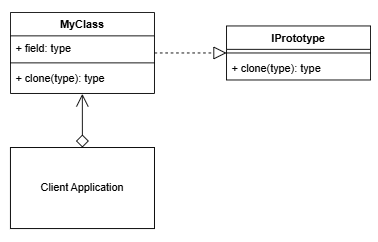

**Terminology**
* *Prototype Interface*: The interface that describes the `clone()` method.
* *Prototype*: The Object/Product that implements the Prototype interface.
* *Client*: The client application that uses and creates the ProtoType.


### **Shallow vs. Deep Copy**

Cloning involves duplicating the state of an existing object, resulting in a new object with the same properties. 

The Prototype pattern typically provides two types of cloning: 
* **shallow** copy 
* and **deep** copy.

A shallow copy replicates the top-level structure of an object but does not create copies of its nested objects. 

In contrast, a deep copy replicates both the top-level structure and all nested objects, creating entirely independent copies.

Shallow copying is often faster and more straightforward, but it can lead to shared references within nested objects. 
```python
import copy
...
copy.copy(self.some_list_of_objects)
...
```

Deep copying, on the other hand, ensures complete independence between the original and cloned objects but can be more complex and resource-intensive.

```python
import copy
...
copy.deepcopy(self.some_list_of_objects)
...
```

In [1]:
from abc import ABC, abstractmethod

'''
Interface with clone method
'''

class IProtoType(ABC):
    
    @staticmethod
    @abstractmethod
    def clone():
        """The clone, deep or shallow.
        It is up to you how you want to implement
        the details in your concrete class"""

In [5]:
'''
A Concrete Class
'''
class MyClass1(IProtoType):
    def __init__(self, field):
        self.field = field  

    def clone(self):
        " This clone method uses a shallow copy technique "
        return type(self)(self.field)

    def __str__(self):
        return f"{id(self)}\tfield={self.field}\ttype={type(self.field)}"

In [3]:
from copy import deepcopy
'''
A Concrete Class
'''
class MyClass2(IProtoType):
    def __init__(self, field):
        self.field = field  

    def clone(self, memo=None): #This clone method uses a deep copy technique
        '''
        Memo is the dictionary that is used by the `deepcopy` library to prevent infinite recursive copies in
        instances of circular references. Pass it to all the `deepcopy` calls  you make in the `__deepcopy__` implementation to prevent infinite
        recursions
        '''
        if memo is None:
            memo = {}
            
        copiedField=deepcopy(self.field)
        newSelf=self.__class__(copiedField)
        newSelf.__dict__=deepcopy(self.__dict__, memo)
        return newSelf

    def __str__(self):
        return f"{id(self)}\tfield={self.field}\ttype={type(self.field)}"

In [6]:
obj0=MyClass1([1,2,3])
print(f"obj0: {obj0}")

obj0: 1896950124224	field=[1, 2, 3]	type=<class 'list'>


In [8]:
obj1=obj0.clone()
print(f"obj1: {obj1}")

obj1: 1896949487632	field=[1, 2, 3]	type=<class 'list'>


In [9]:
obj1.field[0]=100
print(f"obj0: {obj0}")
print(f"obj1: {obj1}")

obj0: 1896950124224	field=[100, 2, 3]	type=<class 'list'>
obj1: 1896949487632	field=[100, 2, 3]	type=<class 'list'>


In [10]:
obj00=MyClass1("Hanna")
print(f"obj00: {obj00}")

obj10=obj00.clone()
print(f"obj10: {obj10}")

obj10.field="Instructor"

print(f"obj00: {obj00}")
print(f"obj10: {obj10}")


obj00: 1896949487952	field=Hanna	type=<class 'str'>
obj10: 1896949488592	field=Hanna	type=<class 'str'>
obj00: 1896949487952	field=Hanna	type=<class 'str'>
obj10: 1896949488592	field=Instructor	type=<class 'str'>


In [11]:
obj000=MyClass2(['a',1, False])
print(f"obj000: {obj000}")

obj100=obj000.clone()
print(f"obj100: {obj100}")

obj100.field[-1]=True

print(f"obj000: {obj000}")
print(f"obj100: {obj100}")

obj000: 1896950124896	field=['a', 1, False]	type=<class 'list'>
obj100: 1896949489872	field=['a', 1, False]	type=<class 'list'>
obj000: 1896950124896	field=['a', 1, False]	type=<class 'list'>
obj100: 1896949489872	field=['a', 1, True]	type=<class 'list'>


### Prototype Registry

The Prototype Registry acts as a centralized repository for frequently-used prototypes, simplifying their storage and retrieval. 

In [16]:
class PrototypeRegistry:
    # Cache to store objects/prototypes
    prototypes = {}
    
    @staticmethod
    def add_prototype(name, prototype):
        PrototypeRegistry.prototypes[name] = prototype
    
    @staticmethod
    def get_prototype( name):
        if name in PrototypeRegistry.prototypes:
            return PrototypeRegistry.prototypes[name].clone()
        else:
            raise ValueError(f"Prototype '{name}' not found.")
        
    @staticmethod
    def initialize():
        #load MyClass1
        my1=MyClass1(1)
        PrototypeRegistry.prototypes.setdefault(MyClass1.__name__, my1)        
        '''OR
        PrototypeRegistry.add_prototype(MyClass1.__name__, my1)
        '''
        
        #load MyClass2
        my2=MyClass2(1)
        PrototypeRegistry.prototypes.setdefault(MyClass2.__name__, my1)
        
        
        
        

In [17]:
PrototypeRegistry.initialize()

In [15]:
obj000=PrototypeRegistry.get_prototype('MyClass2')
obj001=PrototypeRegistry.get_prototype('MyClass2')
print(f"obj000: {obj000}")
print(f"obj001: {obj001}")

obj002=PrototypeRegistry.get_prototype('MyClass1')
obj003=PrototypeRegistry.get_prototype('MyClass1')
obj003.field="Hanna"
print(f"obj002: {obj002}")
print(f"obj003: {obj003}")

obj004=PrototypeRegistry.get_prototype('MyClass1')
obj004.field=[1,2,3]
print(f"obj002: {obj002}")
print(f"obj003: {obj003}")
print(f"obj004: {obj004}")

obj000: 1896949496272	field=1	type=<class 'int'>
obj001: 1896949494672	field=1	type=<class 'int'>
obj002: 1896949494992	field=1	type=<class 'int'>
obj003: 1896949495632	field=Hanna	type=<class 'str'>
obj002: 1896949494992	field=1	type=<class 'int'>
obj003: 1896949495632	field=Hanna	type=<class 'str'>
obj004: 1896949495952	field=[1, 2, 3]	type=<class 'list'>


In [18]:
PrototypeRegistry.add_prototype('MyClass1_1', MyClass1([100,200]))

In [ ]:
obj005=PrototypeRegistry.get_prototype('MyClass1_1')
obj005.field[0]=300 #!!!! PROBLEM
obj006=PrototypeRegistry.get_prototype('MyClass1_1')
print(f"obj005: {obj005}")
print(f"obj006: {obj006}")

obj005: 1896956445072	field=[300, 200]	type=<class 'list'>
obj006: 1896956445712	field=[300, 200]	type=<class 'list'>


### Prototype & Builder Bundle

Let's show the implementation of the Prototype pattern using the example of building armies for the military strategy "Punic Wars". ​

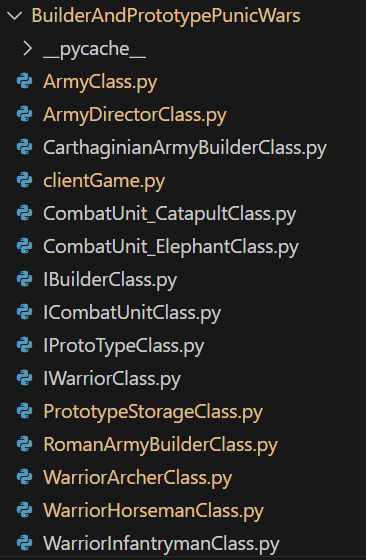

In [ ]:
from BuilderAndPrototypePunicWars.clientGame import PunicsWarsGame